### Bitcoin Linear Regression Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

os.chdir('C:/Users/gerar/OneDrive/Documentos/GitHub/bitcoinPred')  # Set the working directory

def load_data(file_path="data/processed/btc_linear.csv"):
    """Load the dataset into a pandas DataFrame."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} was not found. Run fetch_data.py first.")
    
    df = pd.read_csv(file_path)
    return df

def inspect_data(df):
    """Print basic info and statistics."""
    print("First 5 rows:\n", df.head(), "\n")
    print("Data Summary:\n", df.info(), "\n")
    print("Descriptive Statistics:\n", df.describe(), "\n")
    print("Missing Values:\n", df.isnull().sum(), "\n")

if __name__ == "__main__":
    df = load_data()
    inspect_data(df)

First 5 rows:
       open     high      low    close       volume     close_time  \
0  4060.00  4089.97  3830.91  3910.04   902.332129  1505865599999   
1  3910.04  4046.08  3820.00  3900.00   720.935076  1505951999999   
2  3889.99  3910.00  3567.00  3609.99  1001.654084  1506038399999   
3  3592.84  3750.00  3505.55  3595.87   838.966425  1506124799999   
4  3595.88  3817.19  3542.91  3780.00   752.792791  1506211199999   

   quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0        3.558315e+06              7342                   257.320352   
1        2.839584e+06              7231                   395.275138   
2        3.757043e+06              8714                   517.258926   
3        3.031771e+06              8152                   511.059869   
4        2.799707e+06              8402                   431.946710   

   taker_buy_quote_asset_volume  ...  middle_band        MACD  MACD_signal  \
0                  1.016804e+06  ...    4177.8425 -148.3987

#### Data Prep

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Data preparation function
def prepare_data(file_path):
    """
    Prepares the data for machine learning by adding a target column,
    splitting into training and testing sets, and scaling the features.

    Args:
        file_path (str): Path to the processed CSV file.

    Returns:
        X_train_scaled, X_test_scaled, y_train, y_test: Scaled features and target splits.
    """
    # Load the processed data
    df = pd.read_csv(file_path)

    # Add the target column for the next day's closing price
    df['target'] = df['close'].shift(-1)

    # Drop the last row with NaN target
    df = df.dropna()

    # Drop non-numeric columns from features
    X = df.drop(columns=['target'])  # Exclude 'target'
    y = df['target']

    # Split into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test


#### Build and Train Model

In [4]:

# Model training and evaluation function
def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    """
    Trains a Linear Regression model and evaluates its performance.

    Args:
        X_train, X_test: Scaled feature sets for training and testing.
        y_train, y_test: Target values for training and testing.

    Returns:
        model: The trained Linear Regression model.
    """
    # Initialize the Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Model Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

    return model

# Main execution block
file_path = "data/processed/btc_linear.csv"  # Path to your processed data
try:
    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(file_path)

    # Train and evaluate the model
    model = train_and_evaluate_model(X_train, X_test, y_train, y_test)
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")



Model Evaluation Metrics:
Mean Absolute Error (MAE): 1290.48
Root Mean Squared Error (RMSE): 1853.46
R² Score: 0.99


#### Visualize Predictions

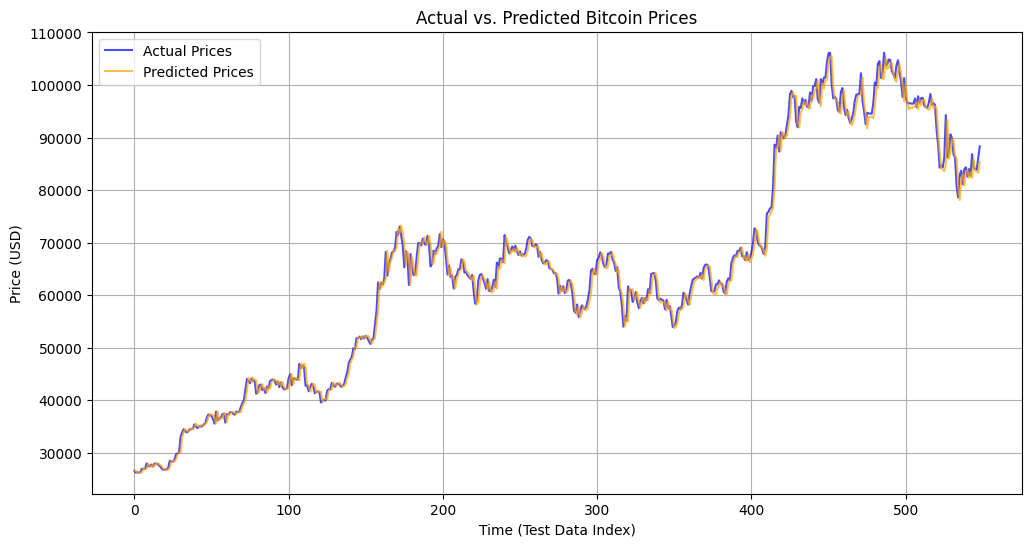

      open     high      low    close       volume     close_time  \
0  4060.00  4089.97  3830.91  3910.04   902.332129  1505865599999   
1  3910.04  4046.08  3820.00  3900.00   720.935076  1505951999999   
2  3889.99  3910.00  3567.00  3609.99  1001.654084  1506038399999   
3  3592.84  3750.00  3505.55  3595.87   838.966425  1506124799999   
4  3595.88  3817.19  3542.91  3780.00   752.792791  1506211199999   

   quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0        3.558315e+06              7342                   257.320352   
1        2.839584e+06              7231                   395.275138   
2        3.757043e+06              8714                   517.258926   
3        3.031771e+06              8152                   511.059869   
4        2.799707e+06              8402                   431.946710   

   taker_buy_quote_asset_volume  ...  middle_band        MACD  MACD_signal  \
0                  1.016804e+06  ...    4177.8425 -148.398764  -119.000477

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data/processed/btc_linear.csv")

# Visualize actual vs. predicted prices
def plot_predictions(model, X_test, y_test):
    """
    Plots the actual vs. predicted prices.

    Args:
        model: The trained model.
        X_test: Scaled test features.
        y_test: Actual target values for the test set.
    """
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Plot actual vs. predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label="Actual Prices", color="blue", alpha=0.7)
    plt.plot(y_pred, label="Predicted Prices", color="orange", alpha=0.7)
    plt.title("Actual vs. Predicted Bitcoin Prices")
    plt.xlabel("Time (Test Data Index)")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()

# Define features and target
X = data[['open', 'high', 'low', 'close', 'volume', 'moving_avg_7', 'moving_avg_30', 'volatility_7', 'volatility_30']]
y = data['returns']

# Call the function to plot predictions
plot_predictions(model, X_test, y_test)

print(data.head())  # Display the first few rows of the dataset
print(data.columns)  # Display the column names

### Adding Technical Indicators and Lagged Features

### Train and Evaluate Model w/New Features

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Data preparation function
def prepare_data_with_new_features(file_path):
    """
    Prepares the data for machine learning by adding a target column,
    splitting into training and testing sets, and scaling the features.

    Args:
        file_path (str): Path to the processed CSV file.

    Returns:
        X_train_scaled, X_test_scaled, y_train, y_test: Scaled features and target splits.
    """
    # Load the processed data
    df = pd.read_csv(file_path)

    # Add the target column for the next day's closing price
    df['target'] = df['close'].shift(-1)

    # Drop the last row with NaN target
    df = df.dropna()

    # Drop non-numeric columns from features
    X = df.drop(columns=['target'])  # Exclude 'target'
    y = df['target']

    # Split into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Model training and evaluation function
def train_and_evaluate_model_with_new_features(X_train_scaled, X_test_scaled, y_train, y_test):
    """
    Trains a Linear Regression model and evaluates its performance with the new features.

    Args:
        X_train_scaled, X_test_scaled: Scaled feature sets for training and testing.
        y_train, y_test: Target values for training and testing.

    Returns:
        model: The trained Linear Regression model.
    """
    # Initialize the Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Model Evaluation Metrics with New Features:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

    return model

# Main execution block
file_path = "data/processed/btc_linear.csv"  # Path to the new processed data
try:
    # Prepare the data with the new features
    X_train, X_test, y_train, y_test = prepare_data_with_new_features(file_path)

    # Train and evaluate the model with the new features
    model = train_and_evaluate_model_with_new_features(X_train, X_test, y_train, y_test)
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Model Evaluation Metrics with New Features:
Mean Absolute Error (MAE): 1290.48
Root Mean Squared Error (RMSE): 1853.46
R² Score: 0.99


In [8]:
import pickle

# Save the trained Linear Regression model
with open("src/models/linear_regression.pkl", "wb") as f:
    pickle.dump(model, f)

### Save the Model

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle

# Load the processed dataset
df = pd.read_csv("data/processed/btc_linear.csv")

# Drop the target column ('close') to create features (X)
X = df.drop(columns=["close"])  # Ensure 'year', 'month', 'day' are included
y = df["close"]  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Save the trained model
with open("src/models/linear_regression.pkl", "wb") as f:
    pickle.dump(model, f)

TypeError: got an unexpected keyword argument 'squared'

In [13]:
import sklearn
print(sklearn.__version__)

1.6.1


In [10]:
import pickle

# Save the trained Linear Regression model
with open("src/models/linear_regression.pkl", "wb") as f:
    pickle.dump(model, f)